In [10]:
import pandas as pd
import psycopg2
import os
import matplotlib.pyplot as plt

OUT_DIR="ExperimentResult"

PGHOST = 'cs598-ccc.ccloxhsqkhj3.us-east-1.rds.amazonaws.com'
PGDATABASE = 'cs598-ccc'
PGUSER = 'postgres'
PGPASSWORD = 'yXzgbn8YXZ2ZfMRwgX83'

def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ PGHOST +" port="+ "5432" +" dbname="+ PGDATABASE +" user=" + PGUSER \
                  +" password="+ PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

test_list = [('CpuIntensiveFunction', 'factorial_1', 'cesar_1204_1830'),
            ('MemoryIntensiveFunction', 'array_summation_1', 'cesar_1204_1440' ),
            ('ImageProcessingFunction', 'grayscale_conversion_1', 'cesar_1205_1100'),
            ('BigDataProcessingFunction', 'big_data_processing_1', 'cesar_1204_1900')]

In [6]:
TESTING CONNECTION

In [9]:
# Connecting to DB
conn, cursor = connect()

query = """select count(*)
from public.logs_processor_data
where experiment_id='cesar_1205_1100'
"""

# Execute SQL Command and commit to DB
res = cursor.execute(query)
print(f"res: {res}")
conn.rollback()

Connected!
res: None


Processing data

In [21]:
df_result = []

for (functionType, functionName, experimentID) in test_list:
    query = f"""
    select *
    from public.logs_processor_data
    where function_name='{functionName}' and experiment_id='{experimentID}'
    order by created_date asc
    """
    temp = pd.read_sql(query, conn)
    
    temp['duration'] = temp.payload.apply(lambda x: (x['duration']))
    temp['memory_size'] = temp.payload.apply(lambda x: (x['memory_size']))
    temp['billed_duration'] = temp.payload.apply(lambda x: (x['billed_duration']))
    temp['max_memory_used'] = temp.payload.apply(lambda x: (x['max_memory_used']))
    temp.reset_index(inplace=True)
    
    temp['functionType'] = functionType
    df_result.append(temp)

df = pd.concat(df_result)

/var/folders/t0/xhb53xj17m19gtl1dcm8yvm80000gn/T/ipykernel_4202/2183902384.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql(query, conn)
/var/folders/t0/xhb53xj17m19gtl1dcm8yvm80000gn/T/ipykernel_4202/2183902384.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql(query, conn)
/var/folders/t0/xhb53xj17m19gtl1dcm8yvm80000gn/T/ipykernel_4202/2183902384.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql(query, conn)
/var/folders/t0/xhb53xj17m19gtl1dcm8yvm80000gn/T/

In [12]:
df.groupby("functionType").size()

functionType
BigDataProcessingFunction    187
CpuIntensiveFunction         817
ImageProcessingFunction      233
MemoryIntensiveFunction      774
dtype: int64

In [13]:
df.head()

,index,request_id,function_name,payload,created_date,status,experiment_id,duration,memory_size,billed_duration,max_memory_used,functionType
0,0,28426e99-53c1-4022-a867-1586c51868ef,factorial_1,"{'cost': 38912, 'duration': 18.4, 'function_id...",2023-12-05 02:29:55.896763,P,cesar_1204_1830,18.40,2048,19,54,CpuIntensiveFunction
1,1,902763a0-49a6-483a-9d80-3221e870753d,factorial_1,"{'cost': 45056, 'duration': 21.26, 'function_i...",2023-12-05 02:29:55.900739,P,cesar_1204_1830,21.26,2048,22,54,CpuIntensiveFunction
2,2,ad8a38d5-8a29-44d9-969e-cefdabfcf527,factorial_1,"{'cost': 40960, 'duration': 19.5, 'function_id...",2023-12-05 02:29:55.916485,P,cesar_1204_1830,19.50,2048,20,54,CpuIntensiveFunction
3,3,153f4e42-1309-4a37-9890-1950cc0c6d1f,factorial_1,"{'cost': 49152, 'duration': 23.42, 'function_i...",2023-12-05 02:29:55.918450,P,cesar_1204_1830,23.42,2048,24,54,CpuIntensiveFunction
4,4,1fd0e918-81b0-4dff-ae44-b21e65ee2750,factorial_1,"{'cost': 32768, 'duration': 15.18, 'function_i...",2023-12-05 02:29:55.920117,P,cesar_1204_1830,15.18,2048,16,54,CpuIntensiveFunction


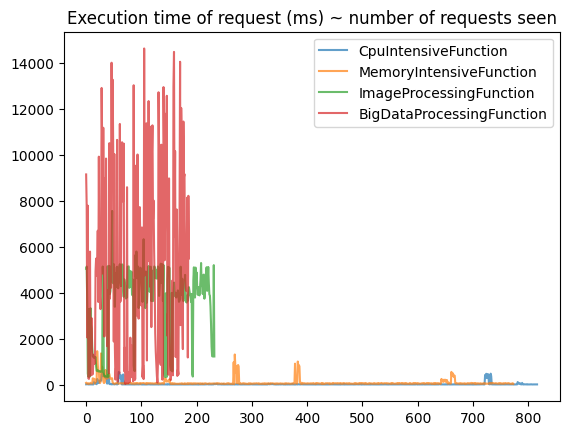

In [14]:
for (functionType, functionName, experimentID) in test_list:
    plt.plot(df[df.function_name==functionName].index, df[df.function_name==functionName].duration, alpha=0.7, label=functionType)
    plt.legend()
plt.title("Execution time of request (ms) ~ number of requests seen")
plt.savefig(os.path.join(OUT_DIR,'H1_ExecutionTimeVsNumberOfRequests.png'))

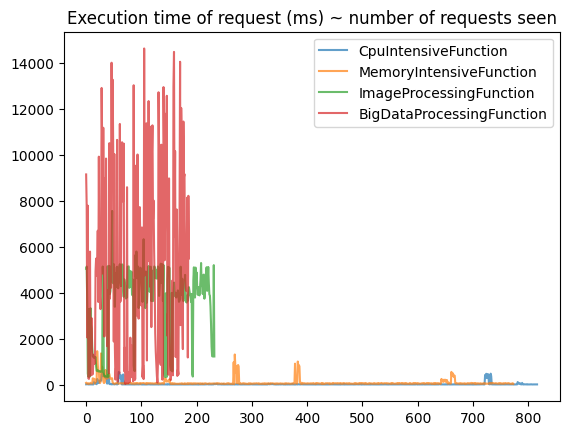

In [15]:
for (functionType, functionName, experimentID) in test_list:
    plt.plot(df[df.function_name==functionName].index, df[df.function_name==functionName].duration, alpha=0.7, label=functionType)
    plt.legend()
plt.title("Execution time of request (ms) ~ number of requests seen")
plt.savefig(os.path.join(OUT_DIR,'H1_ExecutionTimeVsNumberOfRequests.png'))

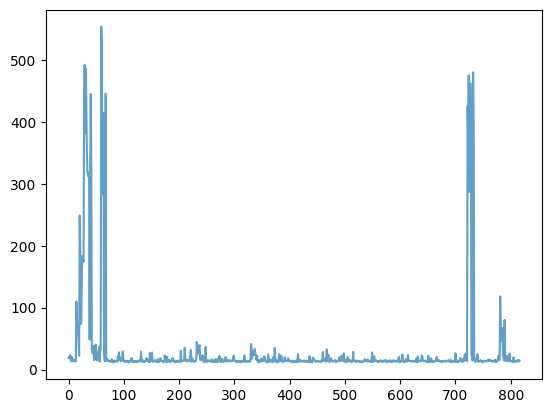

In [22]:
plt.plot(df[df.function_name=='factorial_1'].index, df[df.function_name=='factorial_1'].duration, alpha=0.7, label=functionType)

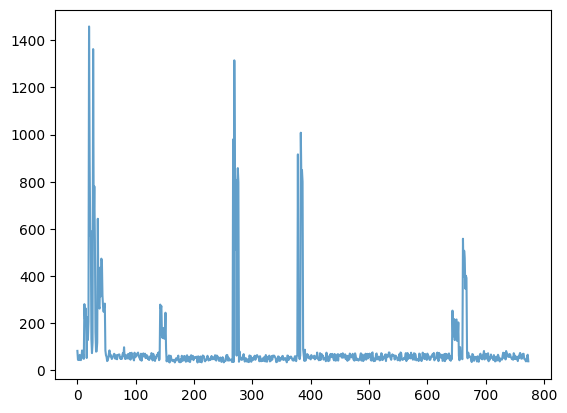

In [23]:
plt.plot(df[df.function_name=='array_summation_1'].index, df[df.function_name=='array_summation_1'].duration, alpha=0.7, label=functionType)

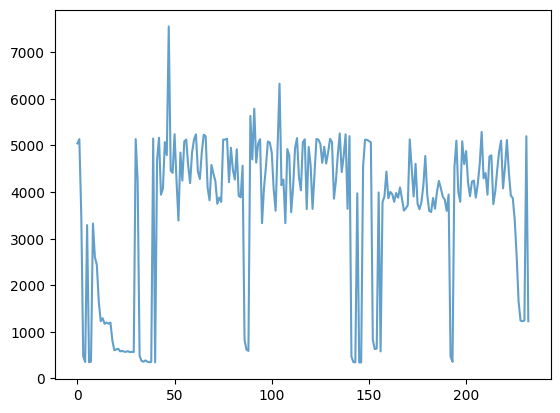

In [24]:
plt.plot(df[df.function_name=='grayscale_conversion_1'].index, df[df.function_name=='grayscale_conversion_1'].duration, alpha=0.7, label=functionType)

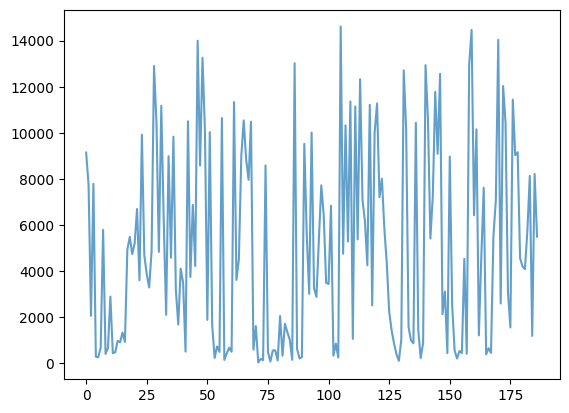

In [25]:
plt.plot(df[df.function_name=='big_data_processing_1'].index, df[df.function_name=='big_data_processing_1'].duration, alpha=0.7, label=functionType)

In [17]:
# Connecting to DB
conn, cursor = connect()

query = """select *
from public.logs_processor_data
where experiment_id='cesar_1204_1900'
order by created_date asc
"""

# Execute SQL Command and commit to DB
df = pd.read_sql(query, conn)

Connected!


/var/folders/t0/xhb53xj17m19gtl1dcm8yvm80000gn/T/ipykernel_4202/3031198305.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [18]:
df['cost'] = df.payload.apply(lambda x: (x['cost']))

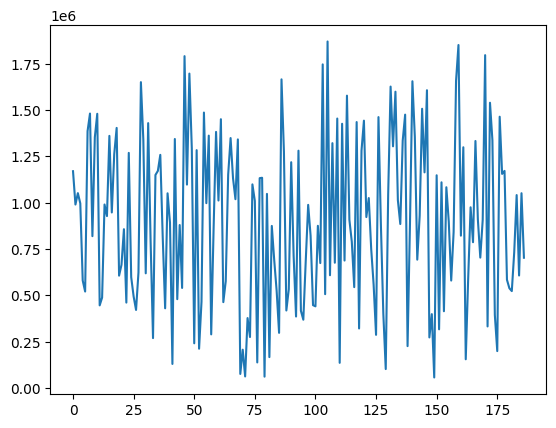

In [19]:
plt.plot(df.index, df.cost)